In [1]:
from siphon.simplewebservice.wyoming import WyomingUpperAir
from datetime import datetime
from MSEplots import plots as mpt

In [2]:
# reading data prociding vertical profiles of T, Td, pressure and height
date = datetime(2013, 8, 25, 0)
station = 'MFL'

df = WyomingUpperAir.request_data(date, station)
pressure = df['pressure'].values 
Temp = df['temperature'].values 
Temp_dew = df['dewpoint'].values 
altitude = df['height'].values 

from metpy.calc.thermo import *
from metpy.units import units
q = mixing_ratio(saturation_vapor_pressure(Temp_dew*units.degC),pressure*units.mbar)
q = specific_humidity_from_mixing_ratio(q)

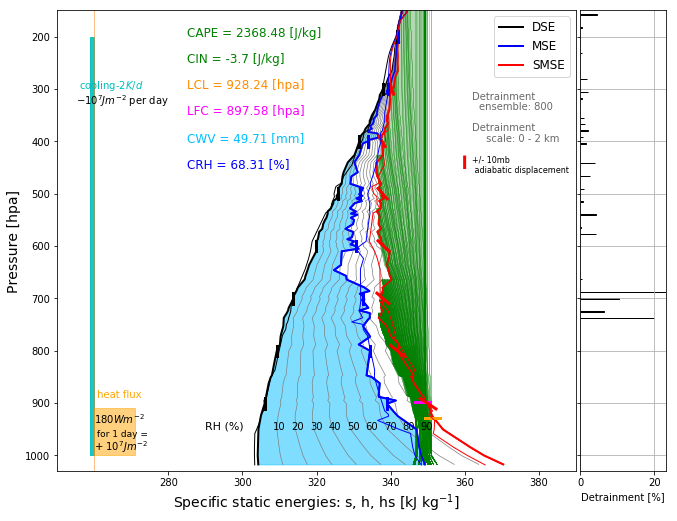

In [4]:
ax = mpt.msed_plots(pressure, Temp ,q , h0_std=2000, ensemble_size=20, entrain=True)
mpt.add_RCEREF(ax, cooling=-2,heatflux=180)
mpt.add_curves_Wyoming(ax, datetime(2013,8,26,0),'MFL',linewidth=1.0)